### SAXIE Bot

In [39]:
import requests
import json
from datetime import datetime

In [155]:
class AxieCriterion:
    def __init__(self, query):
        url, params = query.split('?')
        classes = []
        parts = []
        speeds = []
        for param in params.split('&'):
            attr, val = param.split('=')
            if attr == 'class':
                classes.append(val)
            elif attr == 'part':
                parts.append(val)
            elif attr == 'speed':
                speeds.append(int(val))
        speeds = sorted(speeds)
        
        self.body = {
            "operationName": "GetAxieBriefList",
            "query": "query GetAxieBriefList($auctionType: AuctionType, $criteria: AxieSearchCriteria, $from: Int, $sort: SortBy, $size: Int, $owner: String, $filterStuckAuctions: Boolean) {\n  axies(\n    auctionType: $auctionType\n    criteria: $criteria\n    from: $from\n    sort: $sort\n    size: $size\n    owner: $owner\n    filterStuckAuctions: $filterStuckAuctions\n  ) {\n    total\n    results {\n      ...AxieBrief\n      __typename\n    }\n    __typename\n  }\n}\n\nfragment AxieBrief on Axie {\n  id\n  name\n  stage\n  class\n  breedCount\n  image\n  title\n  battleInfo {\n    banned\n    __typename\n  }\n  auction {\n    currentPrice\n    currentPriceUSD\n    __typename\n  }\n  parts {\n    id\n    name\n    class\n    type\n    specialGenes\n    __typename\n  }\n  __typename\n}\n",
            "variables": {
                "auctionType": "Sale",
                "criteria": {
                    "bodyShapes": None,
                    "breedable": None,
                    "breedCount": None,
                    "classes": classes,
                    "hp": [],
                    "morale": [],
                    "numJapan": None,
                    "numMystic": None,
                    "numXmas": None,
                    "parts": parts,
                    "pureness": None,
                    "purity": [],
                    "region": None,
                    "skill": [],
                    "speed": [
                        speeds[0],
                        speeds[-1]
                    ],
                    "stages": None,
                    "title": None
                },
                "filterStuckAuctions": True,
                "from": 0,
                "owner": None,
                "size": 24,
                "sort": "PriceAsc"
            }
        }
        
    def marketplace(self):
        r = requests.post("https://graphql-gateway.axieinfinity.com/graphql", json=self.body)
        data = json.loads(r.text)['data']['axies']
        return data

In [190]:
payload = {
    "operationName": "NewEthExchangeRate",
    "query": "query NewEthExchangeRate {\n  exchangeRate {\n    eth {\n      usd\n      __typename\n    }\n    __typename\n  }\n}\n",
    "variables": {}
}
r = requests.post("https://graphql-gateway.axieinfinity.com/graphql", json=payload)
ethusd = json.loads(r.text)['data']['exchangeRate']['eth']['usd']
ethusd

3367.23

In [118]:
def message(query):
    ac = AxieCriterion(query)
    data = ac.marketplace()
    total = data['total']
    header = '[Axie Marketplace](https://marketplace.axieinfinity.com/axie/?auctionTypes=Sale)\n' + f'Total {total} axies - {datetime.now().strftime("%d/%m/%Y %H:%M:%S")}\n'
    header += json.dumps(ac.body['variables']["criteria"])
    content = 'Lowest Price List\n'
    for axie in data['results']:
        content += f'{axie["auction"]["currentPrice"]} {axie["id"]} {axie["name"]}\n'
    return header, content

In [119]:
query = 'https://marketplace.axieinfinity.com/axie/?class=Bird&part=mouth-doubletalk&part=horn-eggshell&part=back-pigeon-post&part=tail-post-fight&speed=61&speed=61&auctionTypes=Sale'
header, content = message(query)
print(header)

[Axie Marketplace](https://marketplace.axieinfinity.com/axie/?auctionTypes=Sale)
Total 1892 axies - 06/01/2022 19:24:16
{"bodyShapes": null, "breedable": null, "breedCount": null, "classes": ["Bird"], "hp": [], "morale": [], "numJapan": null, "numMystic": null, "numXmas": null, "parts": ["mouth-doubletalk", "horn-eggshell", "back-pigeon-post", "tail-post-fight"], "pureness": null, "purity": [], "region": null, "skill": [], "speed": [61, 61], "stages": null, "title": null}


In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                     
df

,Timestamp,Price1,Price2,Price3


In [188]:
df = df.append({'Timestamp':'2022-01-01', 'Price1':23, 'Price2':26, 'Price3':23}, ignore_index=True)
df = df.append({'Timestamp':'2022-01-02', 'Price1':21, 'Price2':23, 'Price3':29}, ignore_index=True)
df

,Timestamp,Price1,Price2,Price3
0,2022-01-01,23.0,26.0,23.0
1,2022-01-02,23.0,26.0,23.0


([0, 1], <a list of 2 Text xticklabel objects>)

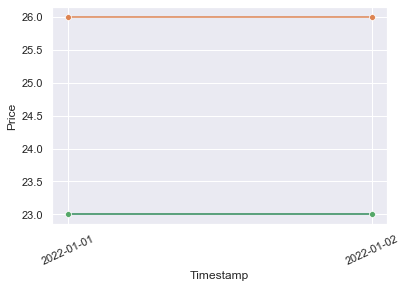

In [189]:
sns.lineplot(x="Timestamp", y="Price1", data=df, marker="o")
sns.lineplot(x="Timestamp", y="Price2", data=df, marker="o")
sns.lineplot(x="Timestamp", y="Price3", data=df, marker="o")
plt.ylabel("Price")
plt.xticks(rotation = 25)

### Leaderboard
- Top 100 rankers' axie id list

In [117]:
url = 'https://graphql-gateway.axieinfinity.com/graphql'

def get_axie_ids(ronin_address):
    query_all_axie_ids = {
        "operationName": "GetAxieLatest",
        "variables": {
            'owner': ronin_address
        },
        "query": "query GetAxieLatest($auctionType: AuctionType, $criteria: AxieSearchCriteria, $from: Int, $sort: SortBy, $size: Int, $owner: String) {\n  axies(auctionType: $auctionType, criteria: $criteria, from: $from, sort: $sort, size: $size, owner: $owner) {\n    total\n    results {\n      ...AxieRowData\n      __typename\n    }\n    __typename\n  }\n}\n\nfragment AxieRowData on Axie {\n  id\n  image\n  class\n  name\n  genes\n  owner\n  class\n  stage\n  title\n  breedCount\n  level\n  parts {\n    ...AxiePart\n    __typename\n  }\n  stats {\n    ...AxieStats\n    __typename\n  }\n  auction {\n    ...AxieAuction\n    __typename\n  }\n  __typename\n}\n\nfragment AxiePart on AxiePart {\n  id\n  name\n  class\n  type\n  specialGenes\n  stage\n  abilities {\n    ...AxieCardAbility\n    __typename\n  }\n  __typename\n}\n\nfragment AxieCardAbility on AxieCardAbility {\n  id\n  name\n  attack\n  defense\n  energy\n  description\n  backgroundUrl\n  effectIconUrl\n  __typename\n}\n\nfragment AxieStats on AxieStats {\n  hp\n  speed\n  skill\n  morale\n  __typename\n}\n\nfragment AxieAuction on Auction {\n  startingPrice\n  endingPrice\n  startingTimestamp\n  endingTimestamp\n  duration\n  timeLeft\n  currentPrice\n  currentPriceUSD\n  suggestedPrice\n  seller\n  listingIndex\n  state\n  __typename\n}\n"
    }
    r = requests.post(url, json = query_all_axie_ids)
    axies = []
    for x in range(0, len(r.json()['data']['axies']['results'])):
        axies.append(r.json()['data']['axies']['results'][x]['id'])

    return axies
print(get_axie_ids('0xcdbf1105d7ef7b3cda9f3875a6141e637d1aefe7'))

['10326359', '9560215', '9936542', '9975797', '10212879', '8691520', '9595601', '9228862', '9197994', '8359533', '8933004', '9309277', '8287641', '2853502', '6363014', '7094103', '7226302', '10419028', '10368255', '10398491']


In [126]:
response = requests.request("GET", 'https://cors-anywhere.herokuapp.com/https://axie.zone/func/profile_content.php?ron_addr=0x57a0458cf65d2df8bc5c2777f7cdcd91f46afdaa&authtoken=051ad03267022259aa654fe75a6983ec5499347befb13a76f8bd8460e9609ac65d4d7f09671bcaf0cf01900ec84aa5d0907b48cbe95c18354217f0d2b4a13709')
response.text


'<form><p>This demo of CORS Anywhere should only be used for development purposes, see <a href="https://github.com/Rob--W/cors-anywhere/issues/301">https://github.com/Rob--W/cors-anywhere/issues/301</a>.<p>To temporarily unlock access to the demo, click on the following button: <input type="submit" value="Request temporary access to the demo server"><input type="hidden" name="accessRequest" value="ac8ade7f94cb0c4ffd40211d6cdc71de25d691dd3bf052b818e8c7dba0ff8393"></form>\n'

In [124]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import re

response = requests.request("GET", 'https://axie.zone/leaderboard')
html = response.text
trs = bs(html).find_all('tr')
leaderboard = []

for tr in trs[1:10]:
    tds = tr.find_all('td')
    rank = int(tds[0].text[1:])
    ron_addr = tds[1].find("a")["href"].split('=')[-1]
    name = tds[1].text
    leaderboard.append([rank, ron_addr, name])
    
# #     Actual Rank
#     dict = get_game_cache(ron_addr)
#     if 'rank' in dict.keys():
#         print(dict['rank'])
#     else:
#         print('n/a')
    
df = pd.DataFrame(leaderboard, columns=['rank', 'ron_addr', 'name'])
df

,rank,ron_addr,name
0,1,0x1e9a08a3b6b34b435208c478d3a26b4817c89110,Rickyson | KLC
1,2,0xcdbf1105d7ef7b3cda9f3875a6141e637d1aefe7,METAT8 | twitch.tv/xero_
2,3,0xa5a2e67b6c70b879806a3eecedfa092109073f8e,Nitthafarm001
3,4,0x4d977b781816a6ab8c4def6f245cc3ab1be6a29e,Micznutz / GLAxie
4,5,0x0051463893d80bd2de2dd31f6a74edac96441de5,0kima | TGL
5,6,0x0e33036753adbb51db74e7fcbf4d9b4a4f37139b,005 - Cr1t. | OG
6,7,0x529d170c28208875d770d0ab5ab795ae45b71915,Bam
7,8,0xc74f2fea624111780b82f9ff70358bda932b255e,Krypto G | PLZ
8,9,0xf148ec489f7f82067beccd5cca0f5334f983f69e,Aciam || Perion


In [109]:
body = {"operationName":"GetAxieDetail","query":"query GetAxieDetail {\naxie1: axie(axieId: 6050811) {\n...AxieDetail\n__typename\n}\n axie2: axie(axieId: 6850043) {\n...AxieDetail\n__typename\n}\n axie3: axie(axieId: 7371757) {\n...AxieDetail\n__typename\n} \n}\nfragment AxieDetail on Axie {\nid\nimage\nclass\nname\ngenes\nbirthDate\nbodyShape\nsireId\nsireClass\nmatronId\nmatronClass\nstage\ntitle\nbreedCount\nparts {\n...AxiePart\n__typename\n}\nstats {\n...AxieStats\n__typename\n}\nchildren {\nid\nname\nclass\nimage\ntitle\nstage\n__typename\n}\n__typename\n}\n\nfragment AxiePart on AxiePart {\nid\nname\nclass\ntype\nspecialGenes\nstage\n__typename\n}\nfragment AxieStats on AxieStats {\nhp\nspeed\nskill\nmorale\n__typename\n}"}
url = "https://axie.zone/func/proxy_graphql.php"
response = requests.post(url, json=body)
json.loads(response.text)

{'data': {'axie1': {'id': '6050811',
   'image': 'https://storage.googleapis.com/assets.axieinfinity.com/axies/6050811/axie/axie-full-transparent.png',
   'class': 'Plant',
   'name': 'Martin',
   'genes': '0x300000000b14b3140c8128c80c8308c20ca318c404c328c40cc328ca0c8220c2',
   'birthDate': 1631542552,
   'bodyShape': 'Normal',
   'sireId': 5180658,
   'sireClass': 'Plant',
   'matronId': 5098049,
   'matronClass': 'Plant',
   'stage': 4,
   'title': '',
   'breedCount': 3,
   'parts': [{'id': 'eyes-cucumber-slice',
     'name': 'Cucumber Slice',
     'class': 'Plant',
     'type': 'Eyes',
     'specialGenes': None,
     'stage': 1,
     '__typename': 'AxiePart'},
    {'id': 'ears-hollow',
     'name': 'Hollow',
     'class': 'Plant',
     'type': 'Ears',
     'specialGenes': None,
     'stage': 1,
     '__typename': 'AxiePart'},
    {'id': 'back-pumpkin',
     'name': 'Pumpkin',
     'class': 'Plant',
     'type': 'Back',
     'specialGenes': None,
     'stage': 1,
     '__typename': 

### Game API
- SLP Claimed/Unclaimed

In [32]:
import requests
import json
addr = "0x01c3373edd0bf64db5cfceb2daef5cdb530d3fda"

#### 1. Rapid API
* [https://rapidapi.com/jchbasco/api/axie-infinity](https://rapidapi.com/jchbasco/api/axie-infinity)

In [20]:
url = f"https://axie-infinity.p.rapidapi.com/get-battle-log/{addr}"
headers = {
    'x-rapidapi-host': "axie-infinity.p.rapidapi.com",
    'x-rapidapi-key': "c01d38970cmsh277dafda5ebc344p14edcdjsn5860e24202a7"
}
response = requests.request("GET", url, headers=headers)
json.loads(response.text)

[{'success': True,
  'items': [],
  'offset': 0,
  'limit': 0,
  'update_time': 1641786416302,
  'notice': 'This is a BETA service. User beware.'}]

#### 2. Axie Management

In [21]:
url = f"https://api.axie.management/v1/history/leaderboard/{addr}"
response = requests.request("GET", url)
json.loads(response.text)

{'disclaimer': "This is a private API if you want to use it, join our discord and we'll get some agreement"}

#### 3. Game API

In [118]:
def get_game_cache(addr):
    url = f"https://game-api.axie.technology/api/v1/{addr}"
    response = requests.request("GET", url)
    return json.loads(response.text)
get_game_cache(addr)

{'success': True,
 'cache_last_updated': 1641973270536,
 'draw_total': 0,
 'lose_total': 0,
 'win_total': 0,
 'total_matches': 0,
 'win_rate': 0,
 'mmr': 1431,
 'rank': 254957,
 'ronin_slp': 0,
 'total_slp': 658,
 'raw_total': 658,
 'in_game_slp': 658,
 'last_claim': 1641468571,
 'lifetime_slp': 0,
 'name': 'SAXIE #1',
 'next_claim': 1642678171}

In [76]:
datetime.fromtimestamp(1641960486359//1000)

datetime.datetime(2022, 1, 12, 13, 8, 6)

In [75]:
addr2 = '0x19bab61497b9cbb4e1c154d2cc62e943ec282ba3'
url = f"https://game-api.axie.technology/api/v1/{addr2}"
response = requests.request("GET", url)
json.loads(response.text)

{'success': True,
 'cache_last_updated': 1641960486359,
 'draw_total': 0,
 'lose_total': 0,
 'win_total': 0,
 'total_matches': 0,
 'win_rate': 0,
 'mmr': 1123,
 'rank': 1621156,
 'ronin_slp': 0,
 'total_slp': 90,
 'raw_total': 90,
 'in_game_slp': 90,
 'last_claim': 1641872685,
 'lifetime_slp': 0,
 'name': 'SAXIE #6',
 'next_claim': 1643082285}

#### 4. Get SLP history
[https://axieandfriends.com/m/3ZYihTd2i/980618735](https://axieandfriends.com/m/3ZYihTd2i/980618735)

In [207]:
import requests

url = "https://axie-infinity.p.rapidapi.com/get-update/0x26d252724d08a30151ab5c87bd6b4fb5eadb1500"

querystring = {"id":"0x26d252724d08a30151ab5c87bd6b4fb5eadb1500"}

headers = {
    'x-rapidapi-host': "axie-infinity.p.rapidapi.com",
    'x-rapidapi-key': "c01d38970cmsh277dafda5ebc344p14edcdjsn5860e24202a7"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
json.loads(response.text)

{'slp': {'total': 2629,
  'claimableTotal': 0,
  'lastClaimedItemAt': 1640925694,
  'rawTotal': 30959,
  'rawClaimableTotal': 28330,
  'todaySoFar': 0,
  'yesterdaySLP': 204,
  'average': 223},
 'leaderboard': {'winRate': '55',
  'winTotal': 0,
  'drawTotal': 0,
  'loseTotal': 0,
  'elo': 1605,
  'rank': 67938,
  'name': 'axie.com.ph - Nyrel'},
 'adventure': {'gained_slp': 0, 'max_slp': 50}}

In [51]:
addr2 = '0xd92512a211795ed6937221db0f9480ca67c5f731'
url = f"https://api.axie.management/v1/history/leaderboard/{addr2}"
response = requests.request("GET", url)
json.loads(response.text)

{'disclaimer': "This is a private API if you want to use it, join our discord and we'll get some agreement"}

In [144]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:95.0) Gecko/20100101 Firefox/95.0",
    "Accept": "*/*",
    "Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3",
    "X-Requested-With": "XMLHttpRequest",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-origin",
    "Cache-Control": "max-age=0"
}

In [145]:
response = requests.request("GET", 'https://axie.zone/func/profile_content.php?ron_addr=0xa5a2e67b6c70b879806a3eecedfa092109073f8e&authtoken=1ba16c58640ccda32bedff33bc9e9ade65d5d4e0a4589e64ceb9909b91f8e40cb9ecefc910bdd7b24528e513be558772bf4e55aaa02588750ae0381f3484635f', headers=headers)
response.text

'Forbidden'